In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import math

feature_select = 'petal_width'

df = pd.read_csv('iris_dataset.csv')
df_setosa = df.loc[df['class'] == 'Iris-setosa']
df_versicolor = df.loc[df['class'] == 'Iris-versicolor']
df_virginica = df.loc[df['class'] == 'Iris-virginica']

x_setosa = np.array(df_setosa[feature_select])
x_versicolor = np.array(df_versicolor[feature_select])
x_virginica = np.array(df_virginica[feature_select])



In [2]:
class GuassianMLE:
    def __init__(self):
        self.mu = 0
        self.sigma = 0
        
    def fit(self, x):
        self.mu = np.average(x)
        self.sigma = np.std(x)
        print('mu:'+str(self.mu))
        print('sigma:'+str(self.sigma)+'\n')
        
    def likelihood(self, x):
        return stats.norm.pdf(x, self.mu, self.sigma)

In [3]:

h_setosa = GuassianMLE()
h_setosa.fit(x_setosa)

h_versicolor = GuassianMLE()
h_versicolor.fit(x_versicolor)

h_virginica = GuassianMLE()
h_virginica.fit(x_virginica)

x_test = 1.2
l_setosa = h_setosa.likelihood(x_test)
l_versicolor = h_versicolor.likelihood(x_test)
l_virginica = h_virginica.likelihood(x_test)
l_max = np.max([l_setosa, l_versicolor, l_virginica])

print("L(x|y=setosa) ~= "+str(l_setosa))
print("L(x|y=versicolor) ~="+str(l_versicolor))
print("L(x|y=virginica) ~="+str(l_virginica))


mu:0.244
sigma:0.10613199329137281

mu:1.3259999999999998
sigma:0.19576516544063705

mu:2.0260000000000002
sigma:0.2718896835115301

L(x|y=setosa) ~= 9.041027550334154e-18
L(x|y=versicolor) ~=1.6566081819787661
L(x|y=virginica) ~=0.014533599979320303


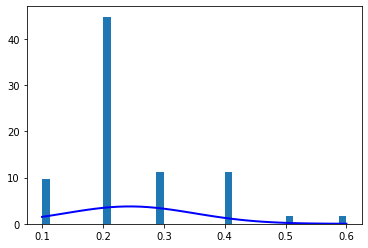

In [4]:
from matplotlib import pyplot as plt

count, bins, ignored = plt.hist(x_setosa, 40, density=True)
plt.plot(bins, h_setosa.likelihood(bins), linewidth=2, color='b')
plt.show()




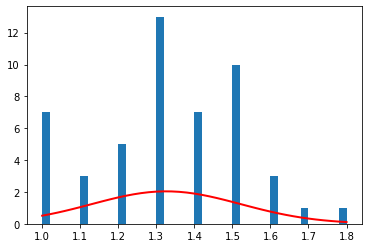

In [5]:
count, bins, ignored = plt.hist(x_versicolor, 40, density=True)
plt.plot(bins,  h_versicolor.likelihood(bins), linewidth=2, color='r')
plt.show()

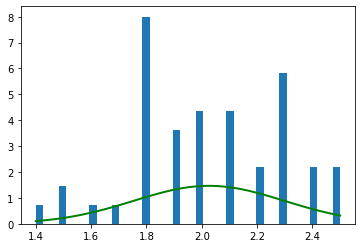

In [6]:
count, bins, ignored = plt.hist(x_virginica, 40, density=True)
plt.plot(bins,  h_virginica.likelihood(bins), linewidth=2, color='g')
plt.show()

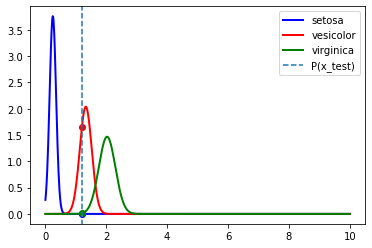

In [7]:
x = np.linspace(0, 10, 1000)
plt.plot(x, stats.norm.pdf(x, h_setosa.mu, h_setosa.sigma),linewidth=2, color='b', label="setosa")

plt.plot(x, stats.norm.pdf(x, h_versicolor.mu, h_versicolor.sigma), linewidth=2, color='r', label="vesicolor")

plt.plot(x, stats.norm.pdf(x, h_virginica.mu, h_virginica.sigma), linewidth=2, color='g', label="virginica")
plt.plot(x_test, h_setosa.likelihood(x_test), 'bo') 
plt.plot(x_test, h_versicolor.likelihood(x_test), 'ro') 
plt.plot(x_test, h_virginica.likelihood(x_test), 'go') 
plt.axvline(x_test, -1, 1, linestyle='--', label="P(x_test)")
plt.legend()
plt.show()